In [1]:
from KMedoids import KMedoids
import matplotlib.pyplot as plt

### Utils

In [2]:
def plot_graphs(data, k_medoids):
    colors = {0:'b*', 1:'g^',2:'ro',3:'c*', 4:'m^', 5:'yo', 6:'ko', 7:'w*'}
    index = 0
    for key in k_medoids.clusters.keys():
        temp_data = k_medoids.clusters[key]
        x = [data[i][0] for i in temp_data]
        y = [data[i][1] for i in temp_data]
        plt.plot(x, y, colors[index])
        index += 1
    plt.title('Cluster formations')
    plt.show()

    medoid_data_points = []
    for m in k_medoids.medoids:
        medoid_data_points.append(data[m])   
    x = [i[0] for i in data]
    y = [i[1] for i in data]
    x_ = [i[0] for i in medoid_data_points]
    y_ = [i[1] for i in medoid_data_points]
    plt.plot(x, y, 'yo')
    plt.plot(x_, y_, 'r*')
    plt.title('Mediods are highlighted in red')
    plt.show()

### Example 1


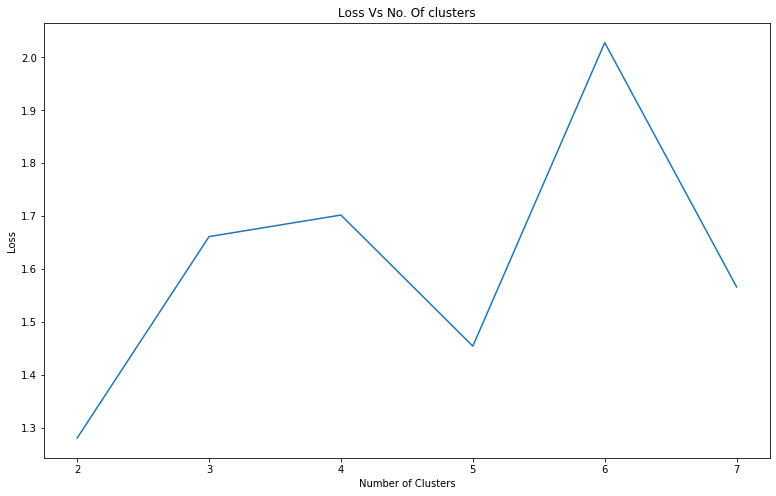

In [3]:
data_ = [
    [5.2, 3.7],[5.1,4.1], [5.2, 4.2], [5, 3.7], [5.3, 4], [5.5, 3.8], [5,4], [4.7, 3.7], [4.8, 4], [4.7, 3.3], [5.2, 3.3],[4.9,3.4], [5.3,3.5]
    ,[2.6, 1.5],[2.5, 1.2],[2.7, 1],[2.4,1.7],[2.6, 1.5],[2.7, 1.8], [2.1, 1.1], [2.2, 1.4], [2.3,0.8], [2.3, 1.3], [2.5,2]
    , [3, 3.5], [3.5, 3.8], [3.9, 3.2], [4.5, 1.9], [4.3, 1.4], [4, 2]
]
n_clusters = range(2,8)
k_medoids = [KMedoids(n_cluster=i) for i in n_clusters]
k_medoids = [k_medoid.fit(data_) for k_medoid in k_medoids]
loss = [k_medoid.calculate_distance_of_clusters() for k_medoid in k_medoids]

# Plot elbow curve (to know best cluster count)
plt.figure(figsize=(13,8))
plt.plot(n_clusters,loss)
plt.xticks(n_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Loss')
plt.title('Loss Vs No. Of clusters')
plt.show()

### Observations
1. As number of clusters increases, the loss increases & then it starts decreasing. This curve differs from data set to data set
2. For number of clusters = 2, the loss is minimum
3. Lets take clusters = 2 as the best number of clusters

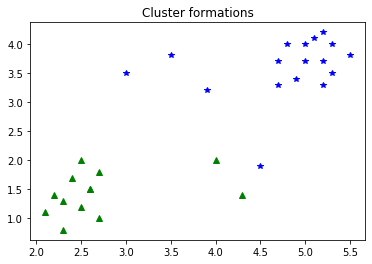

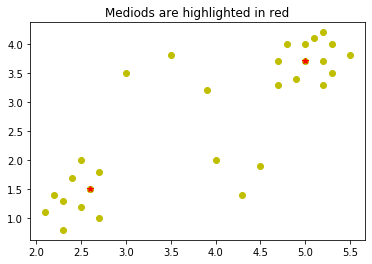

In [4]:
k_medoids = KMedoids(n_cluster=2)
k_medoids.fit(data_)
plot_graphs(data_, k_medoids);

### Example 2

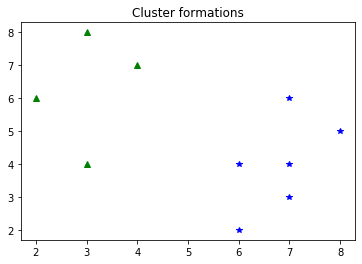

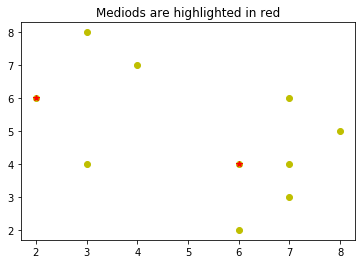

In [5]:
# https://en.wikipedia.org/wiki/K-medoids
data = [[2, 6], [3, 4], [3, 8], [4, 7], [6, 2], [6, 4], [7, 3], [7, 4], [8, 5], [7, 6]]
k_medoids = KMedoids(n_cluster=2)
k_medoids.fit(data)
plot_graphs(data, k_medoids)